# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [34]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [35]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-03/2.4-lab/code/starter-code


In [36]:
# Load the data (use delim_whitespace=True)
def read_table(path): return pd.read_table( path, delim_whitespace=True ) 
path = "../../assets/datasets/salary.dat" 
df = read_table(path)
# Take a look
#inplace allows you to do this without having to redefine the dataframe as something else
df.sort_values(by='sl', inplace=True)
df

,sx,rk,yr,dg,yd,sl
50,female,assistant,1,doctorate,1,15000
47,female,assistant,2,doctorate,2,15350
45,male,assistant,2,doctorate,1,16094
46,female,assistant,2,doctorate,6,16150
48,male,assistant,1,doctorate,1,16244
44,male,assistant,2,doctorate,3,16500
49,female,assistant,1,doctorate,1,16686
38,male,assistant,4,doctorate,5,16700
37,male,assistant,4,doctorate,4,17095
43,female,assistant,3,doctorate,3,17250


In [37]:
# Apply value_counts() to series for "sx", "dg", and "rk"
print 'sx Value Counts: '
print pd.value_counts(df['sx'].values, sort=False)
print ''
print 'dg Value Counts: '
print ''
print pd.value_counts(df['dg'].values, sort=False)
print ''
print 'rk Value Counts: '
print pd.value_counts(df['rk'].values, sort=False)

sx Value Counts: 
male      38
female    14
dtype: int64

dg Value Counts: 

doctorate    34
masters      18
dtype: int64

rk Value Counts: 
assistant    18
full         20
associate    14
dtype: int64


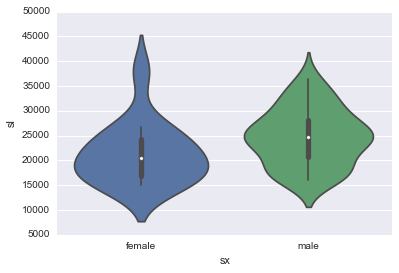

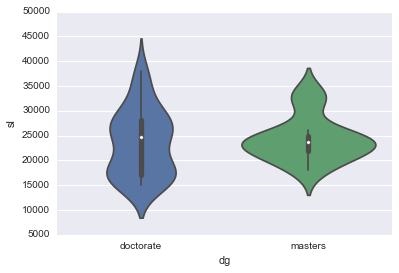

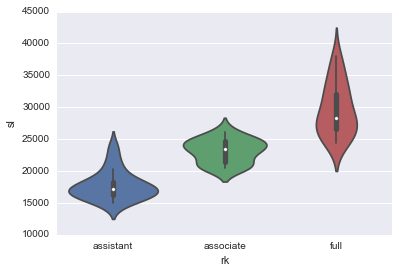

In [80]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [39]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables in order to convert rank, degree, and sex to numbers so they can be plotted
#Can't do math on categorical values

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)#The prefix is the 'sx'_male part to identify category of the vars
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
50,female,assistant,1,doctorate,1,15000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
47,female,assistant,2,doctorate,2,15350,1.0,0.0,1.0,0.0,0.0,1.0,0.0
45,male,assistant,2,doctorate,1,16094,0.0,1.0,1.0,0.0,0.0,1.0,0.0
46,female,assistant,2,doctorate,6,16150,1.0,0.0,1.0,0.0,0.0,1.0,0.0
48,male,assistant,1,doctorate,1,16244,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [40]:
#Now you can drop any of the categorical values that you just gave numerical values to.
#You can also drop any dummy variables that only have two options - if you drop female, and it's a 0 for male,
#you know it's female since there are no other options
#Try reruning the next cell multiple times. You should see an improvement for some samples.
#df.sample?

In [77]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)
X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample:", lm.score(X, y)#.score gives you r^2 value - evalute your model's fit

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", lm.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

#Now you're doing this with Ridge and cross validation in order to generalize your model to accept future data
lmR = linear_model.RidgeCV(alphas=[10, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample with regularization:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", lm.score(X, y)

# Did the results improve?

Sample: 0.319110154671
All data with sample model: 0.577960395215
Sample with regularization: 0.319110154671
All data with regularization model: 0.577960395215


In [78]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm=linear_model.LinearRegression()
lm.fit(X,y)
## Plot the data
## and print the model score

# Apply the same model to the women and compare the model score


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# What about the other order? Apply to women first



# Apply to men


In [44]:
# This time use regularlization (RidgeCV)

# Apply to women first


# Apply to men



### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

In [45]:
mask = (df["dg"] == "doctorate")


In [46]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=


In [47]:
# With regularization

mask = (df["dg"] != "doctorate") # !=


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [48]:
mask = (df["rk"] == "full") # First subset, there are two more


In [49]:
# The second permutation of three

In [50]:
# The third permutation of three

# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [51]:
# Without regularization
mask = df["sx"] == "female"


In [52]:
# With regularization, RidgeCV

In [53]:
# With regularization, LassoCV